# Earthquake Data Visualization with Pandas

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

POSTGRES_USER = os.environ.get("POSTGRES_USER")
POSTGRES_PASSWORD = os.environ.get("POSTGRES_PASSWORD")
POSTGRES_DB = os.environ.get("POSTGRES_DB")
POSTGRES_HOST = os.environ.get("POSTGRES_HOST")
POSTGRES_PORT = os.environ.get("POSTGRES_PORT")


conn = f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
engine = create_engine(conn)

In [2]:
query = "Select * from updated_data;"

df = pd.read_sql_query(query, conn)

df.describe()

,id,magnitude,latitude,longitude,depth,utc_time
count,182035.000000,182035.000000,182035.000000,182035.000000,182035.000000,182035
mean,91018.000000,2.153129,39.183549,-107.536756,33.865215,2023-06-15 10:57:31.148515328
min,1.000000,1.000000,-65.849700,-179.998700,-3.740000,2022-08-07 01:56:38
25%,45509.500000,1.300000,31.617000,-153.192700,5.460000,2023-01-04 00:38:07.500000
50%,91018.000000,1.800000,38.970333,-136.737500,10.000000,2023-06-08 02:13:45
75%,136526.500000,2.500000,59.770200,-110.298500,35.000000,2023-11-22 02:35:05
max,182035.000000,7.800000,86.593900,179.999400,681.240000,2024-05-14 13:56:21
std,52549.122463,1.137001,23.071053,84.250271,65.523545,NaN


## Sort By UTC time

In [3]:
df.sort_values(by="utc_time", ascending=False).head()

# df.sort_values(by="utc_time", ascending=False).tail()


,id,place,city,country,magnitude,latitude,longitude,depth,utc_time
181913,181914,"8 km NNW of The Geysers, California","The Geysers, California",USA,1.1,38.829334,-122.813835,1.95,2024-05-14 13:56:21
181914,181915,"26 km WNW of Central, Alaska","Central, Alaska",USA,1.5,65.669600,-145.317500,0.80,2024-05-14 13:55:17
181915,181916,"8 km NNW of The Geysers, California","The Geysers, California",USA,1.0,38.829834,-122.814163,1.83,2024-05-14 13:52:56
181916,181917,"52 km SSE of Denali National Park, Alaska","Denali National Park, Alaska",USA,1.2,63.091200,-151.405500,0.00,2024-05-14 13:42:23
181917,181918,"8 km SW of Holtville, California","Holtville, California",USA,1.5,32.768667,-115.442500,11.45,2024-05-14 13:05:22


## Sort By Magnitude - highest to lowest

In [4]:
df.sort_values(by="magnitude", ascending=False).head()

,id,place,city,country,magnitude,latitude,longitude,depth,utc_time
87000,86999,"Pazarcik earthquake, Kahramanmaras earthquake ...",Pazarcik earthquake,Kahramanmaras earthquake sequence,7.8,37.2256,37.0143,10.00,2023-02-06 01:17:34
62952,62952,southeast of the Loyalty Islands,the Loyalty Islands,Loyalty Islands,7.7,-23.2063,170.7423,18.05,2023-05-19 02:57:03
60589,60589,"82 km WNW of Hihifo, Tonga",Hihifo,Tonga,7.6,-15.6278,-174.4925,210.00,2023-05-10 16:02:00
134078,134079,"35 km SSW of Aguililla, Mexico",Aguililla,Mexico,7.6,18.4552,-102.9561,26.94,2022-09-19 18:05:08
96163,96163,"Pulau Pulau Tanimbar, Indonesia",Pulau Pulau Tanimbar,Indonesia,7.6,-7.0586,130.0090,104.95,2023-01-09 17:47:35


## Sort By Depth

In [5]:
df.sort_values(by="depth", ascending=False).head()

,id,place,city,country,magnitude,latitude,longitude,depth,utc_time
85611,85611,"208 km ENE of Sola, Vanuatu",Sola,Vanuatu,4.0,-13.1462,169.3241,681.24,2023-04-01 18:09:17
33787,33785,Vanuatu region,Vanuatu region,Vanuatu,4.2,-15.1098,171.6867,675.27,2023-09-18 15:35:27
163898,163899,Fiji region,Fiji region,Fiji,4.2,-19.3114,-177.8158,671.04,2024-03-08 22:42:23
113035,113032,south of the Fiji Islands,the Fiji Islands,Fiji,7.0,-26.0901,178.3427,660.00,2022-11-09 09:51:04
113133,113130,south of the Fiji Islands,the Fiji Islands,Fiji,4.9,-26.0355,178.4719,656.43,2022-11-09 18:41:04


## Correlation

When interpreting correlation coefficients, the values range from -1 to 1:

- 1 indicates a perfect positive correlation: As one variable increases, the other variable increases proportionally.
- -1 indicates a perfect negative correlation: As one variable increases, the other variable decreases proportionally.
- 0 indicates no linear correlation: There is no linear relationship between the variables.

More explaination on correlation at this [correlation-matrix article](https://builtin.com/data-science/correlation-matrix)

In [6]:
df[["magnitude", "depth"]].corr()

,magnitude,depth
magnitude,1.00000,0.30134
depth,0.30134,1.00000


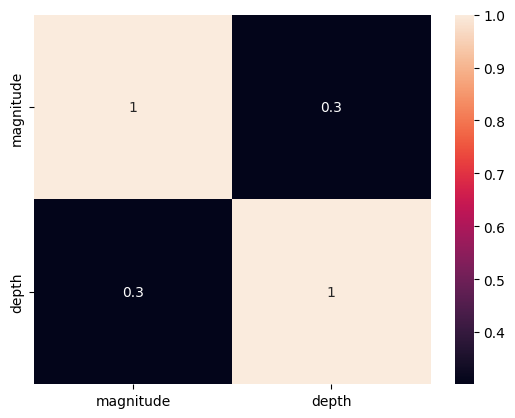

In [7]:
sns.heatmap(df[["magnitude", "depth"]].corr(), annot=True)
plt.show()

- The correlation coefficient between "magnitude" and "magnitude" is 1, which is a perfect positive correlation. This is expected since a variable is always perfectly correlated with itself.
- The correlation coefficient between "depth" and "depth" is 1, indicating a perfect positive correlation, as expected.
- The correlation coefficient between "magnitude" and "depth" is 0.296152. This positive value indicates a positive correlation, but it's not close to 1, indicating a weak positive linear relationship between magnitude and depth.

In [8]:
df[["magnitude", "depth", "latitude", "longitude"]].corr()

,magnitude,depth,latitude,longitude
magnitude,1.000000,0.301340,-0.628298,0.658262
depth,0.301340,1.000000,-0.193544,0.106072
latitude,-0.628298,-0.193544,1.000000,-0.475698
longitude,0.658262,0.106072,-0.475698,1.000000


- **Magnitude and Depth**: 
  - There is a weak positive correlation (0.296152) between magnitude and depth, indicating that there is a tendency for earthquakes with higher magnitudes to occur at slightly greater depths. However, the correlation is not strong.
- **Magnitude and Latitude**: 
  - There is a moderate negative correlation (-0.582706) between magnitude and latitude. This suggests that earthquakes with higher magnitudes tend to occur at lower latitudes (closer to the equator) and vice versa.
- **Magnitude and Longitude**: 
  - There is a strong positive correlation (0.672386) between magnitude and longitude. This indicates that earthquakes with higher magnitudes tend to occur at specific longitudes, and as longitude increases, the magnitude of earthquakes tends to increase as well.
- **Depth and Latitude**: 
  - There is a weak negative correlation (-0.117502) between depth and latitude, suggesting that there is a slight tendency for deeper earthquakes to occur at lower latitudes, but the correlation is not strong.
- **Depth and Longitude**: 
  - There is a weak positive correlation (0.126228) between depth and longitude, indicating a slight tendency for deeper earthquakes to occur at specific longitudes, but the correlation is not strong.
- **Latitude and Longitude**: 
  - There is a moderate negative correlation (-0.488058) between latitude and longitude, suggesting that earthquakes tend to occur at specific latitudes and longitudes. This could indicate geological features or fault lines influencing the distribution of earthquakes.

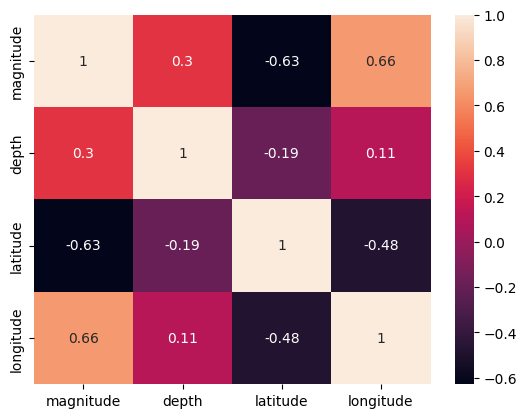

In [9]:
sns.heatmap(df[["magnitude", "depth", "latitude", "longitude"]].corr(), annot=True)
plt.show()

In [10]:
df.columns

Index(['id', 'place', 'city', 'country', 'magnitude', 'latitude', 'longitude',
       'depth', 'utc_time'],
      dtype='object')

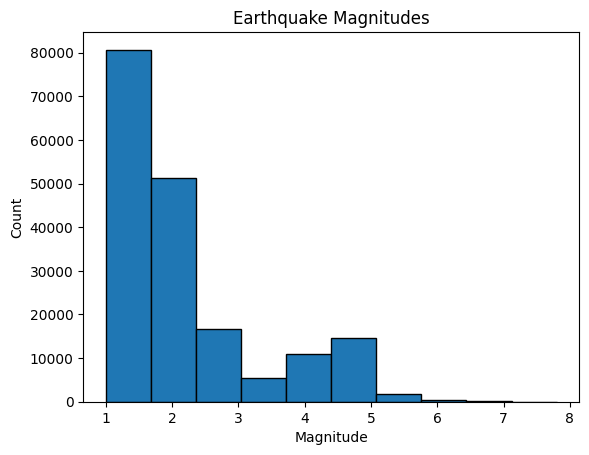

In [11]:
plt.hist(df["magnitude"], bins=10, edgecolor="black")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Earthquake Magnitudes")
plt.show()

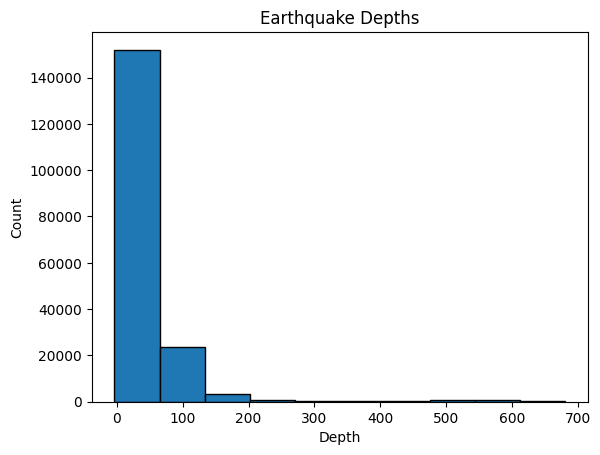

In [12]:
plt.hist(df["depth"], bins=10, edgecolor="black")
plt.xlabel("Depth")
plt.ylabel("Count")
plt.title("Earthquake Depths")
plt.show()

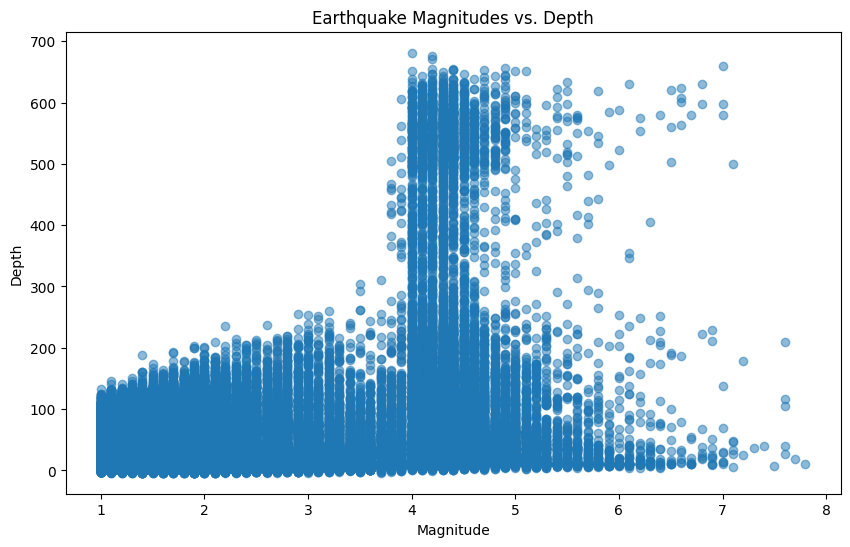

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df["magnitude"], df["depth"], alpha=0.5)
plt.xlabel("Magnitude")
plt.ylabel("Depth")
plt.title("Earthquake Magnitudes vs. Depth")
plt.show()

In [14]:
df["country"].value_counts().head(10)

country
USA                 146560
Puerto Rico           5972
Indonesia             2787
Japan                 2057
Philippines           1794
Fiji                  1473
Papua New Guinea      1193
Mexico                1100
Tonga                 1078
Chile                  984
Name: count, dtype: int64

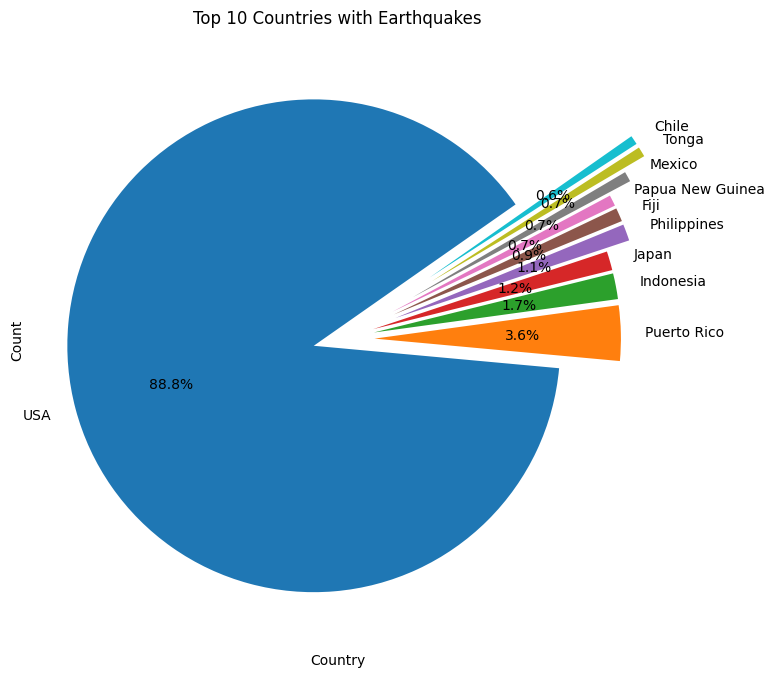

In [15]:
country_counts = df["country"].value_counts().head(10)

explode = (0.1, 0.15, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.45, 0.45)

plt.figure(figsize=(10, 8))
plt.pie(country_counts, labels=country_counts.index, explode=explode,autopct='%1.1f%%', startangle=35)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 Countries with Earthquakes")
plt.show()


In [16]:
engine.dispose()